In [15]:
import os
import pandas as pd

folder = "C:\\Users\\SHIVAM AGARWAL\\OneDrive\\Downloads\\FOREX PAIR DATA"
file_list = [f for f in os.listdir(folder) if f.endswith(".csv")]

for file in file_list:
    full_path = os.path.join(folder, file)
    print(f"Processing {file}...")

    # Load space-separated file with no headers
    df = pd.read_csv(full_path, sep=',', header=None)

    # Drop any empty columns (from multiple spaces)
    df = df.dropna(axis=1, how='all')

    # Assign correct column names
    df.columns = ['datetime', 'open', 'high', 'low', 'close', 'spread']


    # Overwrite the cleaned CSV
    df.to_csv(full_path, index=False)


Processing BTCUSD_H1.csv...
Processing BTCUSD_M1.csv...
Processing EURGBP_H4.csv...
Processing EURGBP_M1.csv...
Processing EURUSD_H4.csv...
Processing EURUSD_M1.csv...
Processing GBPCHF_H4.csv...
Processing GBPCHF_M1.csv...
Processing GBPJPY_H4.csv...
Processing GBPJPY_M1.csv...
Processing GBPUSD_H4.csv...
Processing GBPUSD_M1.csv...
Processing USDCAD_H4.csv...
Processing USDCAD_M1.csv...
Processing USDCHF_H4.csv...
Processing USDCHF_M1.csv...
Processing USDJPY_H4.csv...
Processing USDJPY_M1.csv...
Processing XAGUSD_H4.csv...
Processing XAGUSD_M1.csv...
Processing XAUUSD_H4.csv...
Processing XAUUSD_M1.csv...


In [16]:
import os
import pandas as pd

folder = "C:\\Users\\SHIVAM AGARWAL\\OneDrive\\Downloads\\FOREX PAIR DATA"
file_list = [f for f in os.listdir(folder) if f.endswith(".csv") and ('M1' in f or '1min' in f.lower())]

for file in file_list:
    full_path = os.path.join(folder, file)
    print(f"⏳ Resampling 1-minute file to 3-min: {file}")

    # Remove repeated headers
    with open(full_path, 'r') as f:
        lines = f.readlines()
    clean_lines = [lines[0]]  # keep header
    for line in lines[1:]:
        if not line.lower().startswith('datetime'):
            clean_lines.append(line)

    # Save cleaned version
    temp_path = full_path.replace(".csv", "_temp.csv")
    with open(temp_path, 'w') as f:
        f.writelines(clean_lines)

    # Load and parse datetime
    df = pd.read_csv(temp_path)
    df['datetime'] = pd.to_datetime(df['datetime'])
    df.set_index('datetime', inplace=True)

    # Resample to 3-min OHLC
    df_3min = pd.DataFrame()
    df_3min['open'] = df['open'].resample('3T').first()
    df_3min['high'] = df['high'].resample('3T').max()
    df_3min['low'] = df['low'].resample('3T').min()
    df_3min['close'] = df['close'].resample('3T').last()

    # Add spread if present
    if 'spread' in df.columns:
        df_3min['spread'] = df['spread'].resample('3T').mean()

    df_3min.dropna(inplace=True)
    df_3min.reset_index(inplace=True)

    # Save result
    output_path = full_path.replace(".csv", "_3min.csv")
    df_3min.to_csv(output_path, index=False)
    print(f"✅ Saved resampled file: {output_path}")

    # Cleanup temp file
    os.remove(temp_path)


⏳ Resampling 1-minute file to 3-min: BTCUSD_M1.csv
✅ Saved resampled file: C:\Users\SHIVAM AGARWAL\OneDrive\Downloads\FOREX PAIR DATA\BTCUSD_M1_3min.csv
⏳ Resampling 1-minute file to 3-min: EURGBP_M1.csv
✅ Saved resampled file: C:\Users\SHIVAM AGARWAL\OneDrive\Downloads\FOREX PAIR DATA\EURGBP_M1_3min.csv
⏳ Resampling 1-minute file to 3-min: EURUSD_M1.csv
✅ Saved resampled file: C:\Users\SHIVAM AGARWAL\OneDrive\Downloads\FOREX PAIR DATA\EURUSD_M1_3min.csv
⏳ Resampling 1-minute file to 3-min: GBPCHF_M1.csv
✅ Saved resampled file: C:\Users\SHIVAM AGARWAL\OneDrive\Downloads\FOREX PAIR DATA\GBPCHF_M1_3min.csv
⏳ Resampling 1-minute file to 3-min: GBPJPY_M1.csv
✅ Saved resampled file: C:\Users\SHIVAM AGARWAL\OneDrive\Downloads\FOREX PAIR DATA\GBPJPY_M1_3min.csv
⏳ Resampling 1-minute file to 3-min: GBPUSD_M1.csv
✅ Saved resampled file: C:\Users\SHIVAM AGARWAL\OneDrive\Downloads\FOREX PAIR DATA\GBPUSD_M1_3min.csv
⏳ Resampling 1-minute file to 3-min: USDCAD_M1.csv
✅ Saved resampled file: C:\User


📂 Processing pair: BTCUSD


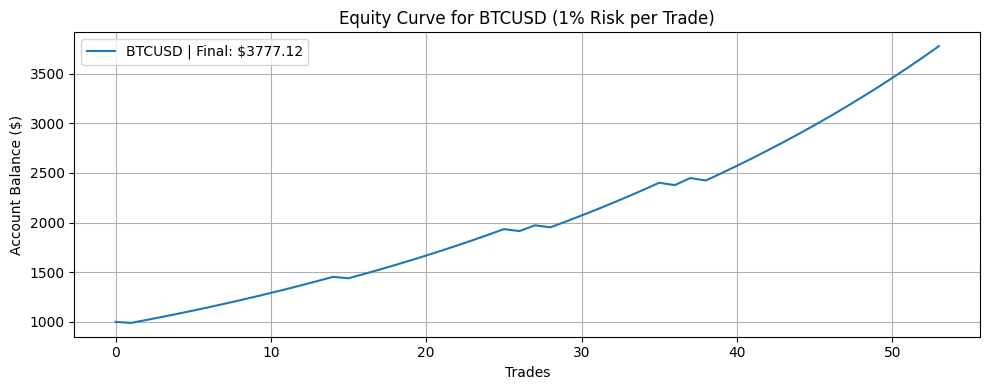


📂 Processing pair: EURGBP


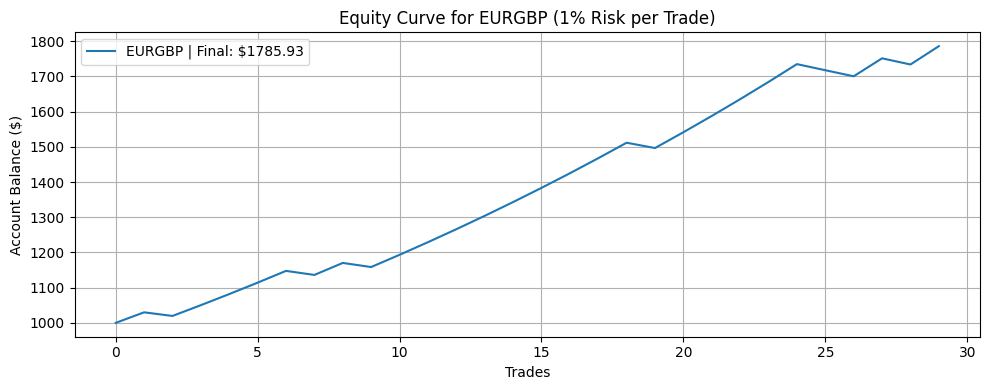


📂 Processing pair: EURUSD


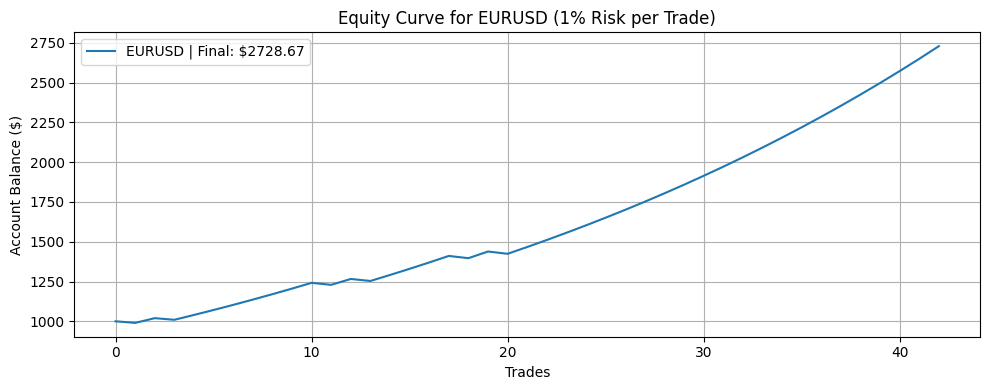


📂 Processing pair: GBPCHF


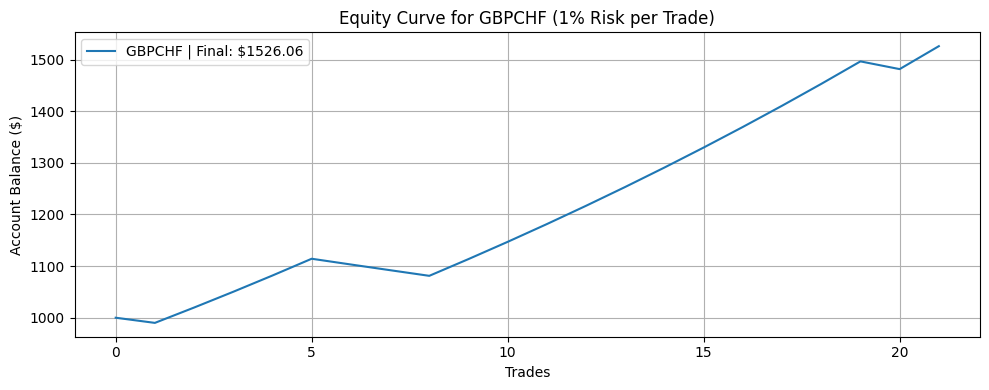


📂 Processing pair: GBPJPY


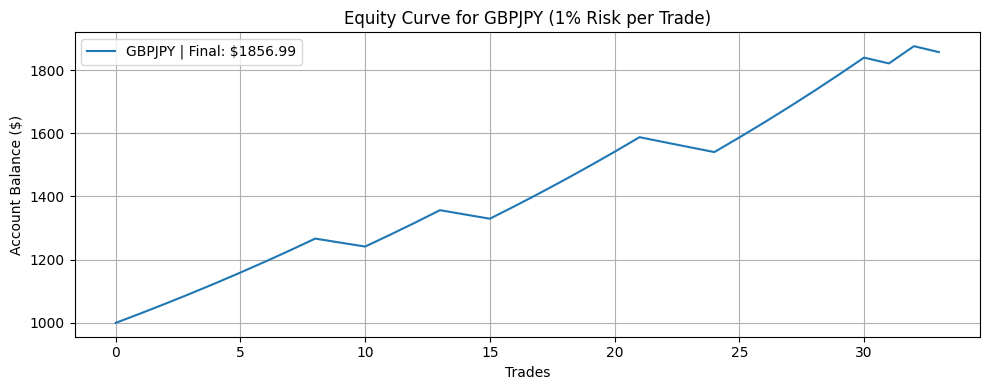


📂 Processing pair: GBPUSD


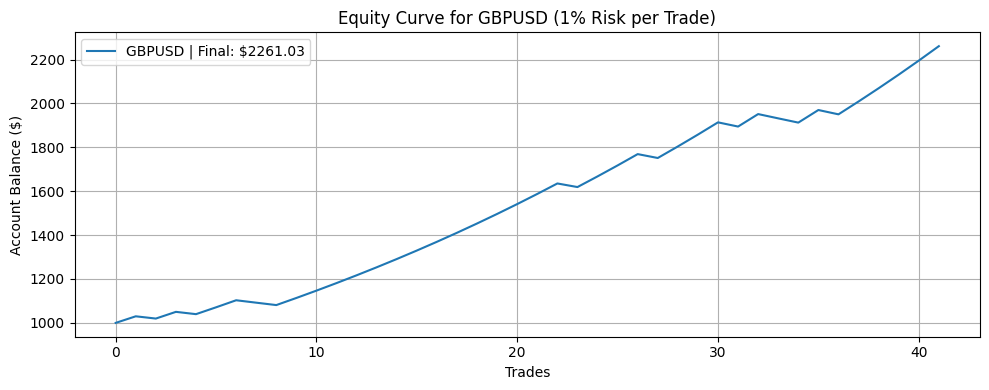


📂 Processing pair: USDCAD


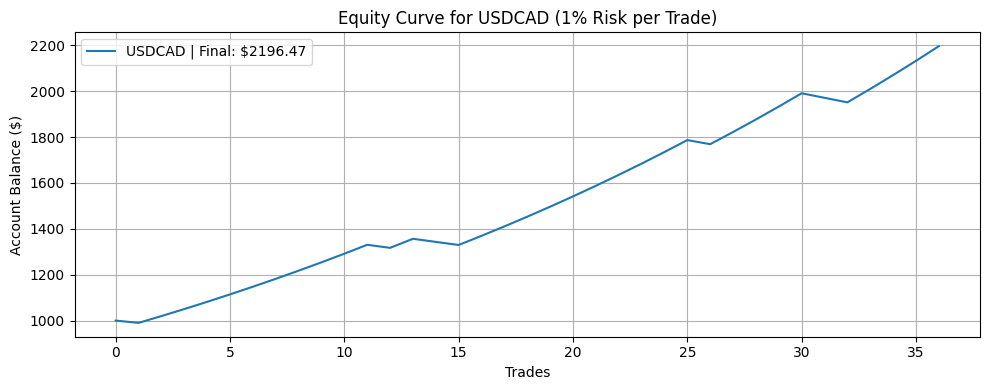


📂 Processing pair: USDCHF


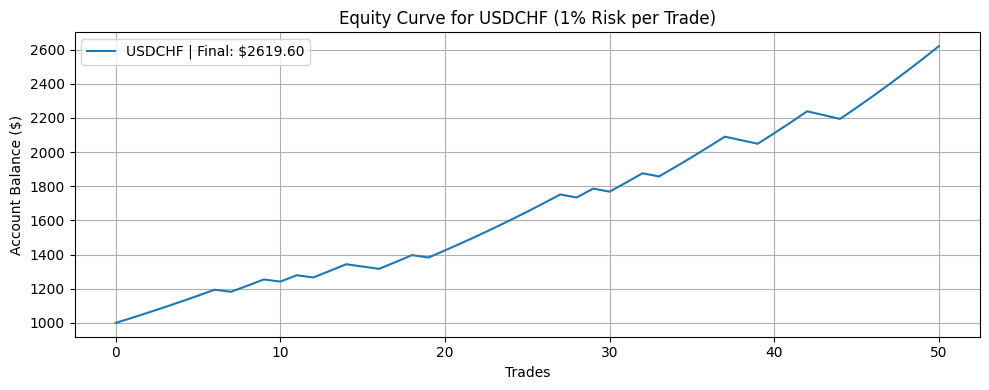


📂 Processing pair: USDJPY


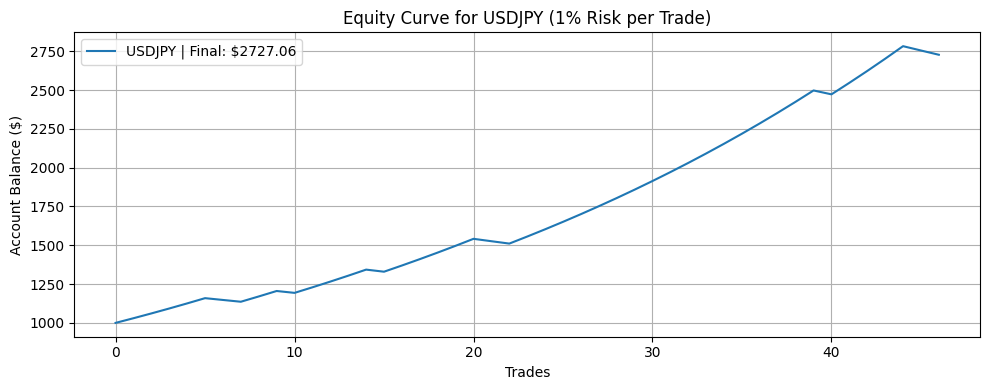


📂 Processing pair: XAGUSD


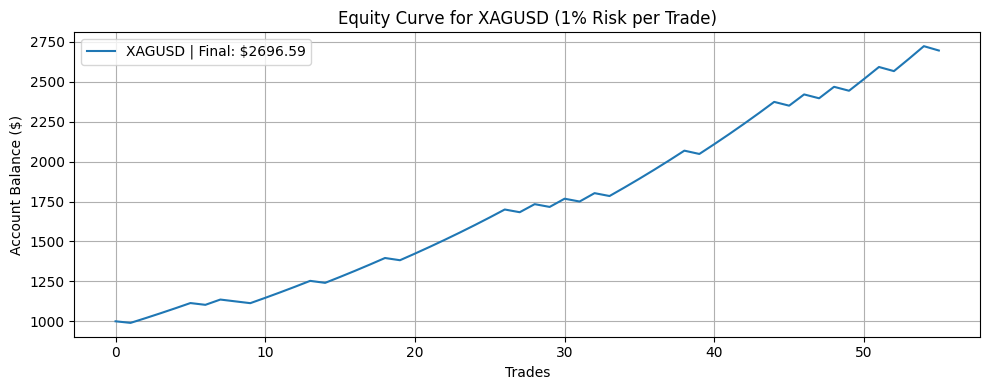


📂 Processing pair: XAUUSD


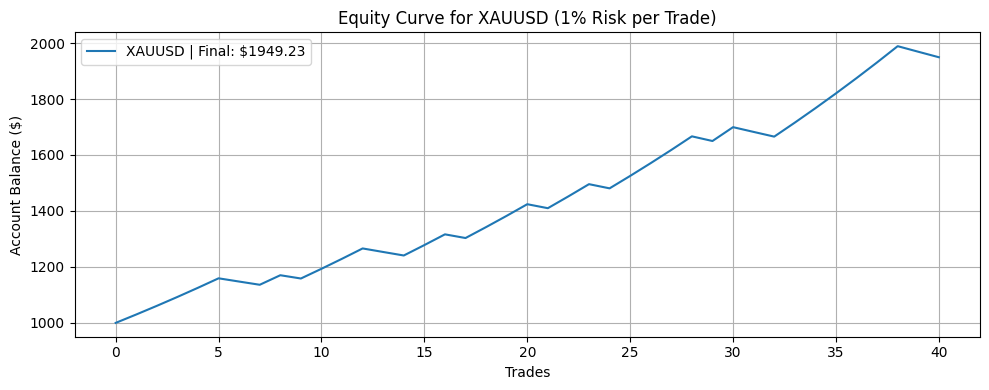


📊 Final Win Rate Summary:

--- BTCUSD ---
Total Trades: 53
Wins: 47
Losses: 6
Unknowns: 0
Win Rate (%): 88.68

--- EURGBP ---
Total Trades: 29
Wins: 22
Losses: 7
Unknowns: 0
Win Rate (%): 75.86

--- EURUSD ---
Total Trades: 42
Wins: 36
Losses: 6
Unknowns: 0
Win Rate (%): 85.71

--- GBPCHF ---
Total Trades: 21
Wins: 16
Losses: 5
Unknowns: 0
Win Rate (%): 76.19

--- GBPJPY ---
Total Trades: 33
Wins: 24
Losses: 9
Unknowns: 0
Win Rate (%): 72.73

--- GBPUSD ---
Total Trades: 41
Wins: 31
Losses: 10
Unknowns: 0
Win Rate (%): 75.61

--- USDCAD ---
Total Trades: 36
Wins: 29
Losses: 7
Unknowns: 0
Win Rate (%): 80.56

--- USDCHF ---
Total Trades: 50
Wins: 37
Losses: 13
Unknowns: 0
Win Rate (%): 74.0

--- USDJPY ---
Total Trades: 46
Wins: 37
Losses: 9
Unknowns: 0
Win Rate (%): 80.43

--- XAGUSD ---
Total Trades: 55
Wins: 39
Losses: 16
Unknowns: 0
Win Rate (%): 70.91

--- XAUUSD ---
Total Trades: 40
Wins: 27
Losses: 13
Unknowns: 0
Win Rate (%): 67.5


In [44]:
import os
import pandas as pd
import matplotlib.pyplot as plt

# --- Folder path ---
folder = "C:\\Users\\SHIVAM AGARWAL\\OneDrive\\Downloads\\FOREX PAIR DATA"
files = os.listdir(folder)

# --- Group 3min and 4hr files ---
pairs = {}
for f in files:
    if f.endswith("_3min.csv"):
        base = f.replace("_M1_3min.csv", "").replace("_3min.csv", "")
        pairs.setdefault(base, {})["3m"] = os.path.join(folder, f)
    elif f.endswith("_H4.csv") or f.endswith("_4hr.csv"):
        base = f.replace("_H4.csv", "").replace("_4hr.csv", "")
        pairs.setdefault(base, {})["4h"] = os.path.join(folder, f)

# --- Strategy Functions ---
def detect_liquidity_sweep(data, high_4h, low_4h):
    for i, row in data.iterrows():
        if row["high"] > high_4h:
            return "up_sweep", i
        elif row["low"] < low_4h:
            return "down_sweep", i
    return None, None

def find_pre_sweep_opposite_candle(data, sweep_time, sweep_type):
    idx = data.index.get_loc(sweep_time)
    for i in range(idx - 1, -1, -1):
        candle = data.iloc[i]
        if sweep_type == "up_sweep" and candle["close"] < candle["open"]:
            return data.index[i], candle
        elif sweep_type == "down_sweep" and candle["close"] > candle["open"]:
            return data.index[i], candle
    return None, None

def confirm_csd(data, pre_sweep_time, pre_sweep_candle, sweep_type):
    idx = data.index.get_loc(pre_sweep_time)
    for i in range(idx + 1, len(data)):
        candle = data.iloc[i]
        if sweep_type == "up_sweep":
            if candle["close"] < pre_sweep_candle["open"] and candle["close"] < candle["open"]:
                return data.index[i], candle
        elif sweep_type == "down_sweep":
            if candle["close"] > pre_sweep_candle["open"] and candle["close"] > candle["open"]:
                return data.index[i], candle
    return None, None

def simulate_trade(csd_candle, sweep_type, rr=3):
    entry = csd_candle["open"]
    if sweep_type == "up_sweep":
        sl = csd_candle["high"]
        tp = entry - (sl - entry) * rr
        return entry, sl, tp, "short"
    else:
        sl = csd_candle["low"]
        tp = entry + (entry - sl) * rr
        return entry, sl, tp, "long"

def simulate_equity_curve(results, initial_balance=1000, risk_per_trade_pct=1, rr_ratio=3):
    balance = initial_balance
    equity_curve = [balance]
    for result in results:
        risk = balance * (risk_per_trade_pct / 100)
        if result == "win":
            balance += risk * rr_ratio
        elif result == "loss":
            balance -= risk
        equity_curve.append(balance)
    return equity_curve

# --- Final Win Rate Summary ---
winrate_summary = {}

# --- Main loop ---
for pair, paths in pairs.items():
    print(f"\n📂 Processing pair: {pair}")

    if "3m" not in paths or "4h" not in paths:
        print(f"❌ Skipping {pair} due to missing timeframe files.")
        continue

    try:
        # Load files
        df_3m = pd.read_csv(paths["3m"])
        df_4h = pd.read_csv(paths["4h"])

        df_3m.columns = df_3m.columns.str.strip().str.lower()
        df_4h.columns = df_4h.columns.str.strip().str.lower()

        # Handle datetime 3m
        if "date" in df_3m.columns and "time" in df_3m.columns:
            df_3m["timestamp"] = pd.to_datetime(df_3m["date"] + " " + df_3m["time"])
            df_3m.drop(columns=["date", "time"], inplace=True)
        elif "datetime" in df_3m.columns:
            df_3m["timestamp"] = pd.to_datetime(df_3m["datetime"])
            df_3m.drop(columns=["datetime"], inplace=True)
        else:
            raise ValueError("Missing date/time or datetime in 3m file")

        # Handle datetime 4h
        if "date" in df_4h.columns and "time" in df_4h.columns:
            df_4h["timestamp"] = pd.to_datetime(df_4h["date"] + " " + df_4h["time"])
            df_4h.drop(columns=["date", "time"], inplace=True)
        elif "datetime" in df_4h.columns:
            df_4h["timestamp"] = pd.to_datetime(df_4h["datetime"])
            df_4h.drop(columns=["datetime"], inplace=True)
        else:
            raise ValueError("Missing date/time or datetime in 4h file")

        df_3m.set_index("timestamp", inplace=True)
        df_4h.set_index("timestamp", inplace=True)

        results = []

        for day in df_4h.index.normalize().unique():
            session_data = df_4h.loc[day.strftime('%Y-%m-%d')]

            session_candle = None
            for t in ["21:00", "20:00", "18:00"]:
                try:
                    temp = session_data.between_time(t, t)
                    if not temp.empty:
                        session_candle = temp.iloc[0]
                        break
                except:
                    continue

            if session_candle is None:
                continue

            high_4h, low_4h = session_candle["high"], session_candle["low"]
            session_start = session_candle.name
            session_end = session_start + pd.Timedelta(hours=6)
            intraday_data = df_3m[(df_3m.index > session_start) & (df_3m.index < session_end)]

            sweep_type, sweep_time = detect_liquidity_sweep(intraday_data, high_4h, low_4h)
            if not sweep_time:
                continue

            pre_time, pre_candle = find_pre_sweep_opposite_candle(intraday_data, sweep_time, sweep_type)
            if pre_candle is None:
                continue

            csd_time, csd_candle = confirm_csd(intraday_data, pre_time, pre_candle, sweep_type)
            if csd_candle is None:
                continue

            entry, sl, tp, direction = simulate_trade(csd_candle, sweep_type)
            future_data = intraday_data[csd_time:]

            hit_tp = hit_sl = False
            for _, candle in future_data.iterrows():
                if direction == "short":
                    if candle["low"] <= tp:
                        hit_tp = True
                        break
                    if candle["high"] >= sl:
                        hit_sl = True
                        break
                else:
                    if candle["high"] >= tp:
                        hit_tp = True
                        break
                    if candle["low"] <= sl:
                        hit_sl = True
                        break

            result = "win" if hit_tp else ("loss" if hit_sl else "unknown")
            results.append(result)

        total = len(results)
        wins = results.count("win")
        losses = results.count("loss")
        unknowns = results.count("unknown")
        win_rate = round((wins / total) * 100, 2) if total else 0

        winrate_summary[pair] = {
            "Total Trades": total,
            "Wins": wins,
            "Losses": losses,
            "Unknowns": unknowns,
            "Win Rate (%)": win_rate
        }

        # Simulate equity
        equity = simulate_equity_curve(results)
        plt.figure(figsize=(10, 4))
        plt.plot(equity, label=f"{pair} | Final: ${equity[-1]:.2f}")
        plt.title(f"Equity Curve for {pair} (1% Risk per Trade)")
        plt.xlabel("Trades")
        plt.ylabel("Account Balance ($)")
        plt.grid(True)
        plt.legend()
        plt.tight_layout()
        plt.show()

    except Exception as e:
        winrate_summary[pair] = {"Error": str(e)}

# --- Print Summary ---
print("\n📊 Final Win Rate Summary:")
for pair, stats in winrate_summary.items():
    print(f"\n--- {pair} ---")
    for k, v in stats.items():
        print(f"{k}: {v}")



📉 Max Drawdown: 2.97%
💰 Final Balance after all trades: $9727409.02


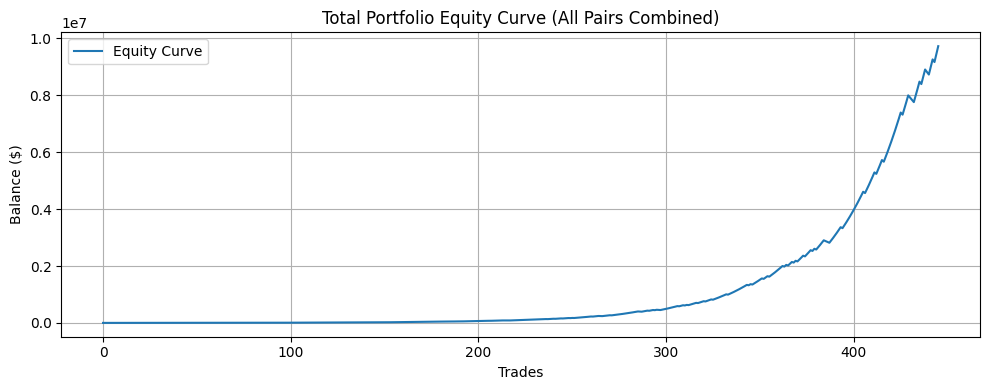

In [45]:
from datetime import datetime

# 1. Collect all trades from all pairs
all_trades = []

for pair, paths in pairs.items():
    if "3m" not in paths or "4h" not in paths:
        continue

    try:
        # Load and preprocess (reuse earlier logic)
        df_3m = pd.read_csv(paths["3m"])
        df_4h = pd.read_csv(paths["4h"])
        df_3m.columns = df_3m.columns.str.strip().str.lower()
        df_4h.columns = df_4h.columns.str.strip().str.lower()

        if "date" in df_3m.columns and "time" in df_3m.columns:
            df_3m["timestamp"] = pd.to_datetime(df_3m["date"] + " " + df_3m["time"])
            df_3m.drop(columns=["date", "time"], inplace=True)
        elif "datetime" in df_3m.columns:
            df_3m["timestamp"] = pd.to_datetime(df_3m["datetime"])
            df_3m.drop(columns=["datetime"], inplace=True)

        if "date" in df_4h.columns and "time" in df_4h.columns:
            df_4h["timestamp"] = pd.to_datetime(df_4h["date"] + " " + df_4h["time"])
            df_4h.drop(columns=["date", "time"], inplace=True)
        elif "datetime" in df_4h.columns:
            df_4h["timestamp"] = pd.to_datetime(df_4h["datetime"])
            df_4h.drop(columns=["datetime"], inplace=True)

        df_3m.set_index("timestamp", inplace=True)
        df_4h.set_index("timestamp", inplace=True)

        for day in df_4h.index.normalize().unique():
            session_data = df_4h.loc[day.strftime('%Y-%m-%d')]

            session_candle = None
            for t in ["21:00", "20:00", "18:00"]:
                try:
                    temp = session_data.between_time(t, t)
                    if not temp.empty:
                        session_candle = temp.iloc[0]
                        break
                except:
                    continue

            if session_candle is None:
                continue

            high_4h, low_4h = session_candle["high"], session_candle["low"]
            session_start = session_candle.name
            session_end = session_start + pd.Timedelta(hours=6)
            intraday_data = df_3m[(df_3m.index > session_start) & (df_3m.index < session_end)]

            sweep_type, sweep_time = detect_liquidity_sweep(intraday_data, high_4h, low_4h)
            if not sweep_time:
                continue

            pre_time, pre_candle = find_pre_sweep_opposite_candle(intraday_data, sweep_time, sweep_type)
            if pre_candle is None:
                continue

            csd_time, csd_candle = confirm_csd(intraday_data, pre_time, pre_candle, sweep_type)
            if csd_candle is None:
                continue

            entry, sl, tp, direction = simulate_trade(csd_candle, sweep_type)

            future_data = intraday_data[csd_time:]
            hit_tp = hit_sl = False
            for _, candle in future_data.iterrows():
                if direction == "short":
                    if candle["low"] <= tp:
                        hit_tp = True
                        break
                    if candle["high"] >= sl:
                        hit_sl = True
                        break
                else:
                    if candle["high"] >= tp:
                        hit_tp = True
                        break
                    if candle["low"] <= sl:
                        hit_sl = True
                        break

            result = "win" if hit_tp else ("loss" if hit_sl else "unknown")
            all_trades.append((csd_time, result))

    except Exception as e:
        continue  # skip errors

# 2. Sort all trades by time
all_trades.sort()

# 3. Simulate equity curve
equity = []
balance = 1000
risk_pct = 1
rr = 3

peak = balance
drawdowns = []

for _, result in all_trades:
    risk = balance * (risk_pct / 100)
    if result == "win":
        balance += risk * rr
    elif result == "loss":
        balance -= risk
    # else unknown, no change

    equity.append(balance)

    if balance > peak:
        peak = balance
    drawdown = (peak - balance) / peak * 100
    drawdowns.append(drawdown)

# 4. Calculate max drawdown
max_dd = round(max(drawdowns), 2)
final_balance = round(equity[-1], 2)

print(f"\n📉 Max Drawdown: {max_dd}%")
print(f"💰 Final Balance after all trades: ${final_balance}")

# 5. Optional: Plot equity curve
import matplotlib.pyplot as plt
plt.figure(figsize=(10,4))
plt.plot(equity, label="Equity Curve")
plt.title("Total Portfolio Equity Curve (All Pairs Combined)")
plt.xlabel("Trades")
plt.ylabel("Balance ($)")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()
